<a href="https://colab.research.google.com/github/tranbaquang1708/GraduationThesis/blob/develop/IGR_Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [ ]:
import torch
from modules import IGR, Visualization, Operation, Distribution

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
dataset, normal_vectors = Operation.circle_dataset(device)

In [ ]:
traineddata_path = mp + '/models/circle_uniform.traineddata'
model = IGR.load_model(traineddata_path, device)

Step 500:
tensor(0.5081, device='cuda:0', grad_fn=<AddBackward0>)
Step 1000:
tensor(0.1364, device='cuda:0', grad_fn=<AddBackward0>)
Step 1500:
tensor(0.1328, device='cuda:0', grad_fn=<AddBackward0>)
Step 2000:
tensor(0.0471, device='cuda:0', grad_fn=<AddBackward0>)
Step 2500:
tensor(0.0673, device='cuda:0', grad_fn=<AddBackward0>)
Step 3000:
tensor(0.0764, device='cuda:0', grad_fn=<AddBackward0>)
Step 3500:
tensor(0.1296, device='cuda:0', grad_fn=<AddBackward0>)
Step 4000:
tensor(0.1020, device='cuda:0', grad_fn=<AddBackward0>)
Step 4500:
tensor(0.0429, device='cuda:0', grad_fn=<AddBackward0>)
Step 5000:
tensor(0.0434, device='cuda:0', grad_fn=<AddBackward0>)


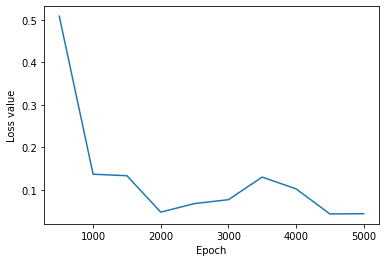

In [ ]:
loss_function = IGR.LossFunction(1, 0.01, Distribution.uniform_distribution)
# loss_function = IGR.LossFunction()
model = IGR.train(dataset, normal_vectors, 5000, 100, device, loss_function, model=model)

In [ ]:
IGR.save_model(traineddata_path, model)

In [ ]:
xx, yy = Visualization.grid_from_torch(dataset[:,0], dataset[:,1], device)

In [ ]:
z = Visualization.nn_sampling(model, xx, yy)

tensor([[-0.9463, -0.9027, -0.8601,  ..., -0.8214, -0.8645, -0.9089],
        [-0.9019, -0.8575, -0.8141,  ..., -0.7740, -0.8179, -0.8630],
        [-0.8585, -0.8133, -0.7692,  ..., -0.7277, -0.7724, -0.8183],
        ...,
        [-0.8157, -0.7684, -0.7222,  ..., -0.6847, -0.7291, -0.7747],
        [-0.8579, -0.8114, -0.7661,  ..., -0.7293, -0.7730, -0.8178],
        [-0.9013, -0.8557, -0.8112,  ..., -0.7751, -0.8180, -0.8620]],
       device='cuda:0', grad_fn=<ViewBackward>)


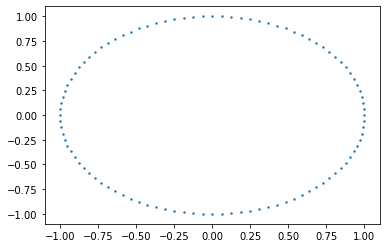

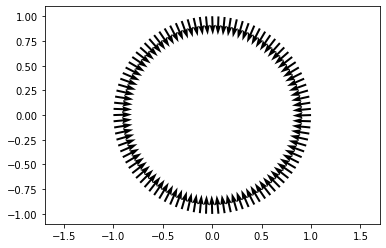

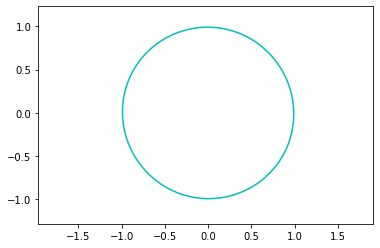

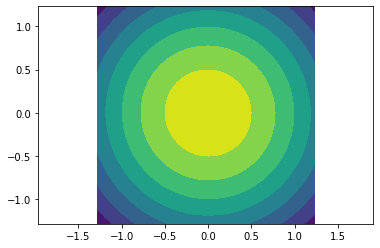

In [ ]:
Visualization.visualize2(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=True, surface=True, filled_contour=True)